In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = {'idade' : [2,6,1,4,3,5],
        'horas' : [50,200,20,150,100,180],
        'historico' : [0,2,0,1,3,2],
        'classificacao' : ["necessita", "necessita", "necessita", "nao necessita", "necessita", "nao necessita"]
}

In [4]:
df = pd.DataFrame(dados)
classe = LabelEncoder()

In [5]:
df['classificacao'] = classe.fit_transform(df['classificacao'])

In [6]:
x = df[['idade', 'horas', 'historico']]
y = df['classificacao']

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
arvore = export_text(modelo, feature_names=list(x.columns))
print(arvore)

|--- horas <= 125.00
|   |--- class: 1
|--- horas >  125.00
|   |--- idade <= 5.50
|   |   |--- class: 0
|   |--- idade >  5.50
|   |   |--- class: 1



In [9]:
nova_maquina = [[8,100,9]]
previsao = modelo.predict(nova_maquina)
print(previsao)

[1]


C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


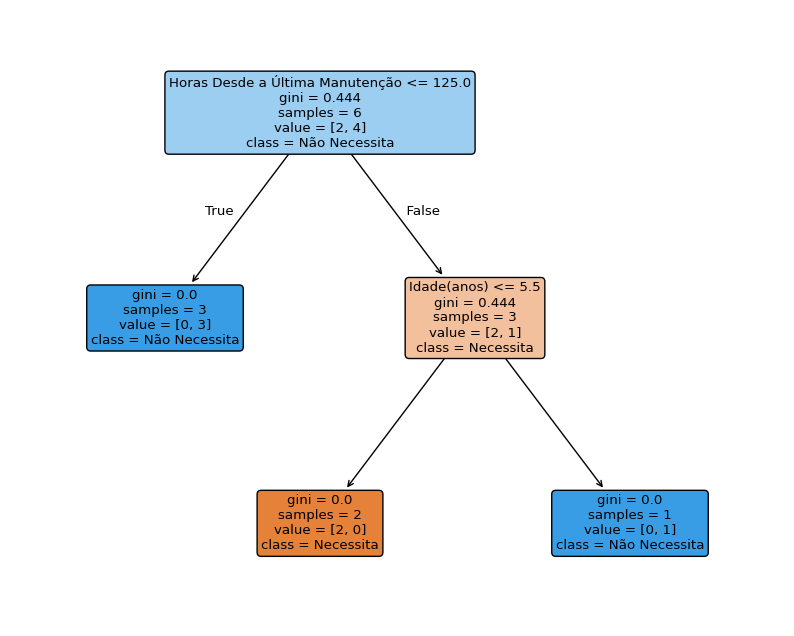

In [10]:
plt.figure(figsize=(10,8))
tree.plot_tree(
    modelo,
    feature_names=["Idade(anos)", "Horas Desde a Última Manutenção", "Histórico de Falhas", "Classificação"],
    class_names=["Necessita", "Não Necessita"],
    filled=True,
    rounded=True
)
plt.show()